# Exploratory Data Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import plotly.graph_objs as go
sns.set_style("whitegrid")
#import altair as alt
#alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
df_path2 = 'Dataset/News_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [19]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [20]:
df1=df.groupby(['Category']).count().reset_index()
x=df1['Content']
y=df1['Category']
fig = go.Figure(go.Bar(
    x=x,
    y=y,
    marker_color='indianred',
    width=0.5,
    orientation='h'))
fig.update_layout(title='Number of articles per category',
    yaxis=dict(
        title='Category',
    ),
    xaxis=dict(
        title='Number of Articles',
    ),
)
fig.show()

In [21]:
df['News_length'] = df['Content'].str.len()

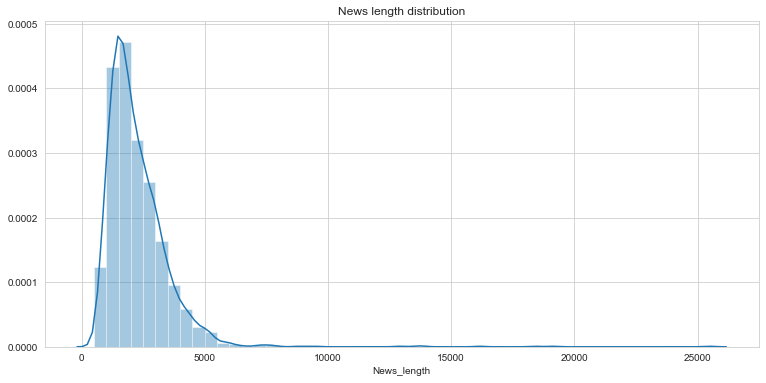

In [22]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [23]:
df['News_length'].describe()

count     2225.000000
mean      2264.790562
std       1364.305951
min        502.000000
25%       1447.000000
50%       1966.000000
75%       2803.000000
max      25484.000000
Name: News_length, dtype: float64

In [24]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

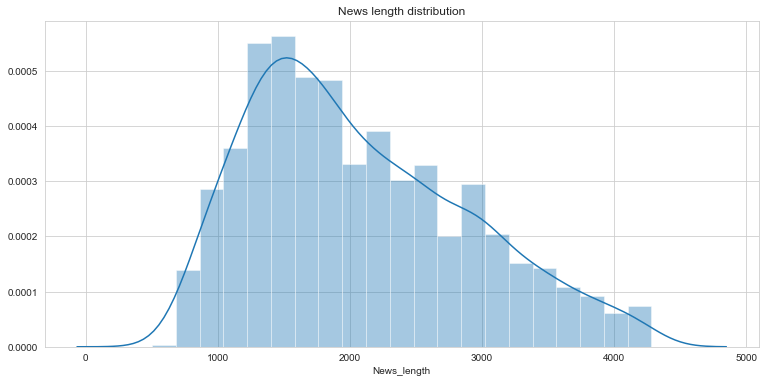

In [25]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [26]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

7

In [27]:
import plotly.express as px

In [28]:
plt.figure(figsize=(12.8,6))
#sns.boxplot(data=df_95, x='Category', y='News_length');
fig=px.box(df_95, x='Category', y='News_length');
fig.show()

<Figure size 921.6x432 with 0 Axes>